# Trabalho final ML

<a href="https://www.kaggle.com/code/reihanenamdari/depression-logistic-regression-and-gridsearchcv/data">Dataset</a>
<br>
<hr>

<br>

#### Contexto e objetivo do trabalho
O trabalho prático da disciplina CMP263 - Aprendizagem de Máquina visa
permitir que os alunos desenvolvam um modelo preditivo para um problema de
interesse, praticando aspectos discutidos na disciplina relacionados ao treinamento e
avaliação de modelos de classificação ou regressão, e interpretação dos modelos
gerados.
A proposta do projeto final é que os alunos aprofundem e consolidem sua
experiência no desenvolvimento de modelos preditivos, abordando aspectos ao
longo de toda a metodologia de treinamento de modelos, conforme discutimos em
aula. 

## Metodologia

CRISP-DM

1. Entendimento do negócio
2. Entendimento dos dados
3. Preparação dos dados
4. Modelagem
5. Validação
6. Deployment

## 1. Entendimento do negócio

### About Dataset
##### Context


O dataset original foi publicado pro Frankcc no seguinte link: <a href="https://www.kaggle.com/datasets/diegobabativa/depression?resource=download">Link Kaggle</a>

O dataset está envolvido na análise da depressão. Os dados consistem de um estudo das condições de vida de pessoas que vivem em zonas rurais. 

- Conteúdo
1. Surveyid 
2. Villeid
3. sex
4. Age
5. Married
6. Numberchildren 
7. educationlevel
8. totalmembers (in the family) 
9. gainedasset
10. durableasset 
11. saveasset
12. livingexpenses 
13. otherexpenses
14. incomingsalary 
15. incomingownfarm 
16. incomingbusiness
17. incomingnobusiness
18. incomingagricultural 
19. farmexpenses
20. laborprimary 
21. lastinginvestment
22. nolastinginvestmen
23. depressed: [ Zero: No depressed] or [One: depressed] (Binary for target class)

the main objective is to show statistic analysis and some data mining techniques.

The dataset has 23 columns or dimensions and a total of 1432 rows or objects.

Acknowledgements
The original attribution is to Frankcc i

Inspiration

<a href="https://zindi.africa/competitions/busara-mental-health-prediction-challenge/data">Busara</a>

## Problema

Classificação -  objetivo é treinar o melhor classificador possível para detectar o risco de depressão



Tirando esta parte, você precisa avaliar as necessidades de pré-processamento dos dados, como imputar valor faltantes, tratar outliers, normalizar, balancear as classes, etc... Você pode aplicar seleção de atributos se deseja avaliar se um subconjunto dos atributos originais já lhe dar bom poder preditivo.

Esse pipeline será integrado a algoritmos de classificação (veja bem, suas saídas são numéricas, mas não se trata de uma regressão. Você tem valores na classe 0 ou 1, pois as classes foram codificadas dessa forma) - e o objetivo será treinar o melhor classificador possível para detectar o risco de depressão.

 

In [626]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing import sequence
import seaborn as sns
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import trange, tqdm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', None)


%matplotlib inline

## i) análise exploratória dos dados
para identificar possíveis problemas nos
dados que possam impactar negativamente no treinamento de modelos;

In [650]:
for dirname, _, filenames in os.walk('/home/kaline/workspace/mestrado/TrabalhoFinalML/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/kaline/workspace/mestrado/TrabalhoFinalML/Dataset/depressed.csv
/home/kaline/workspace/mestrado/TrabalhoFinalML/Dataset/test.csv
/home/kaline/workspace/mestrado/TrabalhoFinalML/Dataset/train.csv


In [628]:
target_column_name = 'depressed'

In [693]:
# Função de carregamento dos dados
def DataLoading():
    df = pd.read_csv("Dataset/depressed.csv")
    
    # Quantidade de colunas e registros de cada dataset carregado
    print('Dataset : ',df.shape)
    
    # Retorna dataset
    return df

# Executa carregamento e guarda em memória
df = DataLoading()

Dataset :  (1429, 75)


In [694]:
df.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0.0,5
1,747,57,24-Oct-61,1,23,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1.0,3
2,1190,115,05-Oct-61,1,22,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0.0,5
3,1065,97,23-Sep-61,1,27,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0.0,0
4,806,42,12-Sep-61,0,59,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0.0,3


### Distribuição da coluna target (depressed)

Classes não balanceadas


A variável target do treino possui 20.36% de positivos.


Text(0.5, 1.0, 'Quantidade de registros por classe')

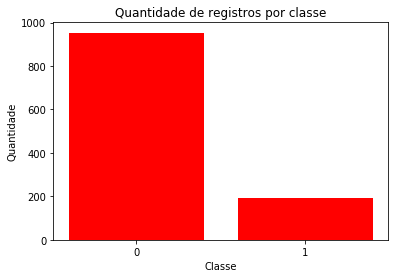

In [631]:
#Contagem de registros por classes
from turtle import color


target_counts = df['depressed'].value_counts()
positives = target_counts[1]
negatives = target_counts[0]

#Proporção em %
prop = (positives/negatives)*100
print('\nA variável target do treino possui {}% de positivos.'. format(round(prop,2)))

#Gráfico
plt.bar(target_counts.index, target_counts,color='red')
plt.xticks([0, 1])
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Quantidade de registros por classe')


#### Tipos de dados nas colunas

Text(0.5, 1.0, 'Quantidade de colunas por tipos de dados')

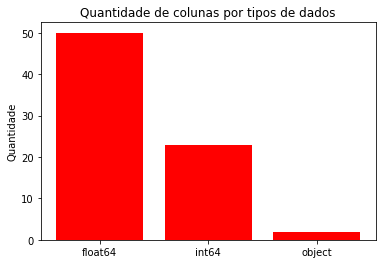

In [632]:
tipos_dados = df.dtypes.value_counts()

#Recurso visual
plt.bar(tipos_dados.index.astype(str), tipos_dados.values, color='red')
plt.ylabel('Quantidade')
plt.title('Quantidade de colunas por tipos de dados')

In [633]:
print('Podemos observar que temos variáveis em diferentes escalas\nO desvio padrão (std) alto')
df.describe()

Podemos observar que temos variáveis em diferentes escalas
O desvio padrão (std) alto


,surveyid,village,femaleres,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1005.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1374.000000,1402.000000,1429.000000,900.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,904.000000,904.000000,1005.000000,1005.000000,1005.000000,560.000000,323.000000,680.000000,1005.000000,904.000000,895.000000,1005.000000,895.000000,1429.0,1429.0,71.000000,851.000000,851.000000,851.000000,846.000000,712.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1147.000000,1429.000000
mean,715.00000,76.286214,0.918125,0.772568,2.883135,4.899230,8.687194,2.041288,4.956219,126.105799,112.970888,144.797796,18.902193,10.165535,0.911025,0.000700,94.189418,8.278906,1.159212,0.638583,2.490822,1.671862,2.731175,3.561964,21.379253,0.179846,0.251924,0.107768,0.260322,0.032890,34.804122,17.235456,4.497855,1.933611,3.723105,21.440986,4.087124,0.918474,3.015487,0.452434,3.032836,0.264677,0.373134,5.612244,7.841135,3.608922,0.516922,0.492901,0.791305,1.924397,0.692294,1.0,1.0,0.509859,51.500386,18.057173,0.703054,1.337025,0.751030,0.213436,20.741777,284.918104,34.337696,0.013296,0.475194,0.070679,4.080613,3.605420,0.188943,2.114914,0.093772,0.169137,3.251225
std,412.66108,66.444012,0.274271,0.419320,1.874472,2.157894,2.923532,2.044081,2.130240,137.591884,237.350489,191.952725,27.552131,75.140134,1.598780,0.026454,112.210862,15.271976,6.350078,2.772324,11.559653,10.058019,7.910116,7.283909,27.628235,0.384194,0.434270,0.310195,0.438964,0.382984,250.224718,105.959383,8.293021,4.012755,11.631465,107.629227,6.327566,2.607594,5.412373,1.728997,2.212765,0.441381,0.483878,10.780444,17.363659,13.274940,0.321939,0.369836,0.339510,3.411772,0.379135,0.0,0.0,0.215925,109.813120,29.959977,0.338945,2.590840,0.830065,0.409876,716.126179,384.790615,144.221318,0.114579,5.857223,0.256377,28.574333,29.223058,0.391601,18.174208,0.291613,0.375036,1.694201
min,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,358.00000,24.000000,1.000000,1.000000,

### Count NAN in each column

In [634]:
df.isnull().sum().sort_values().tail(30)

cons_ownfood                  0
cons_allfood                  0
asset_niceroof                0
asset_savings                 0
asset_land_owned_total        0
age                           1
cons_tobacco                 27
cons_alcohol                 55
depressed                   282
fs_enoughtom                424
hh_totalmembers             424
fs_meat                     424
med_sickdays_hhave          424
fs_sleephun                 424
med_portion_sickinjured     424
med_port_sick_child         525
fs_chskipm_often            525
fs_chwholed_often           525
cons_med_children           529
med_healthconsult           534
med_afford_port             534
ed_expenses                 578
ed_expenses_perkid          578
ed_schoolattend             578
ed_sch_missedpc             583
ed_work_act_pc              717
med_expenses_child_ep       749
med_expenses_hh_ep          869
med_expenses_sp_ep         1106
med_u5_deaths              1358
dtype: int64

## Detecção de outliers

Melhorar a perfomance do R² (score)

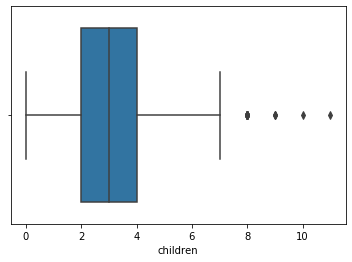

In [635]:
sns.boxplot(df.children)

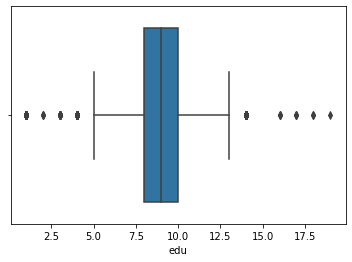

In [636]:
sns.boxplot(df.edu)

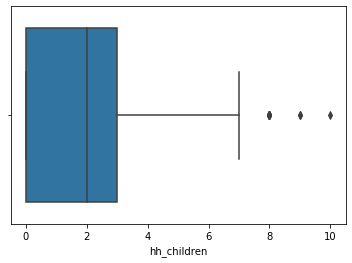

In [637]:
sns.boxplot(df.hh_children)

In [669]:
df

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28,1,4,6,10,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0.0,5
1,747,57,24-Oct-61,1,23,1,3,5,8,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1.0,3
2,1190,115,05-Oct-61,1,22,1,3,5,9,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0.0,5
3,1065,97,23-Sep-61,1,27,1,2,4,10,2,4.0,378.832920,526.671080,196.989040,24.023054,49.647648,0.00,0,289.173520,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.500000,1.500000,0.000000,0,0,778.112300,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0.0,0
4,806,42,12-Sep-61,0,59,0,4,6,10,4,6.0,258.671880,8.260629,173.526540,19.218445,0.000000,0.50,0,173.010990,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.750000,1.750000,1.250000,1,0,201.005620,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,24-Sep-61,1,25,1,1,3,7,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,0,0.000000,0,NaN,1
1425,547,69,23-Nov-61,1,28,1,4,6,10,4,6.0,248.608690,8.260629,157.110780,24.023054,24.023054,3.25,0,155.065580,10.476722,0.0,0.0,0.000000,0.000000,13.145949,8.808454,71.588707,0,1,0,0,0,0.000000,0.0,23.022095,10.215360,1.468075,10.215360,3.0,0

In [639]:
df.head(5)

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0.0,5
1,747,57,24-Oct-61,1,23,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1.0,3
2,1190,115,05-Oct-61,1,22,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0.0,5
3,1065,97,23-Sep-61,1,27,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0.0,0
4,806,42,12-Sep-61,0,59,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0.0,3


In [640]:
df.count()

surveyid              1429
village               1429
survey_date           1429
femaleres             1429
age                   1428
                      ... 
saved_mpesa           1429
amount_saved_mpesa    1429
early_survey          1429
depressed             1147
day_of_week           1429
Length: 75, dtype: int64

In [641]:

# correlation 
print(df.corr())

                    surveyid   village  femaleres   married  children  \
surveyid            1.000000  0.662523   0.025015 -0.011441  0.020242   
village             0.662523  1.000000   0.010970  0.026970  0.030428   
femaleres           0.025015  0.010970   1.000000  0.282472  0.214297   
married            -0.011441  0.026970   0.282472  1.000000  0.227206   
children            0.020242  0.030428   0.214297  0.227206  1.000000   
...                      ...       ...        ...       ...       ...   
saved_mpesa         0.045454  0.047495   0.007214  0.078497  0.043458   
amount_saved_mpesa  0.005823 -0.007197  -0.009764  0.024066 -0.003852   
early_survey       -0.059211 -0.062321  -0.000251 -0.003002 -0.029901   
depressed          -0.021138  0.014286  -0.007864 -0.081358  0.009313   
day_of_week        -0.004995 -0.043296   0.000593 -0.048648  0.020938   

                      hhsize       edu  hh_children  hh_totalmembers  \
surveyid            0.017840 -0.037984    -0.002915

## ii) pré-processamento dos dados
abordando aspectos como correção de
outliers e de valores faltantes, codificação de atributos categóricos, discretização de
atributos numéricos, normalização, ajuste de desbalanceamento de classes e
redução de dimensionalidade

#### Removendo colunas irrelevantes

Minha sugestão no primeiro momento é remover apenas as colunas que pela sua definição não parecem ter relevância/poder preditivo, o que eu acredito ser o caso das duas variáveis com "_id" no final (não olhei em profundidade os dados). Se as variáveis forem categóricas e tiverem muitos valores possíveis, também pode ser difícil usar no modelo. Neste caso, você pode optar por manter apenas um subconjunto de valores para as categorias mais frequentes, e todas as outras agrupar em uma única categoria ("Outros", por exemplo).

In [696]:
# Colunas categoricas
print(df.select_dtypes(include=['object']).columns.tolist())

# Não tenho tempo para trabalhar com colunas de data agora
df.drop(columns=['surveyid','village','survey_date','hhsize','cons_nondurable',
'asset_livestock','asset_durable','asset_phone','asset_land_owned_total',
'asset_niceroof','cons_allfood','cons_ownfood','cons_med_total',
'cons_med_children','cons_ed','cons_social','cons_other','ent_wagelabor',
'ent_ownfarm','ent_business','ent_nonagbusiness','ent_employees',
'ent_nonag_revenue','ent_nonag_flowcost','ent_farmrevenue','ent_farmexpenses',
 'ent_animalstockrev','ent_total_cost','fs_adskipm_often','fs_adwholed_often',
 'fs_chskipm_often','fs_chwholed_often','fs_meat','fs_enoughtom','fs_sleephun',
 'med_expenses_hh_ep','med_expenses_sp_ep','med_expenses_child_ep',
 'med_portion_sickinjured','med_port_sick_child','med_afford_port','med_sickdays_hhave',
 'med_healthconsult','med_vacc_newborns','med_child_check','med_u5_deaths','ed_expenses',
 'ed_expenses_perkid','ed_schoolattend','ed_sch_missedpc',
 'ed_work_act_pc','labor_primary','wage_expenditures','early_survey','day_of_week'], axis=1, inplace=True)


# durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa


['survey_date', 'age']


In [681]:
df.columns
df

,femaleres,age,married,children,edu,hh_children,hh_totalmembers,asset_savings,cons_alcohol,cons_tobacco,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,depressed
0,1,28,1,4,10,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0.0
1,1,23,1,3,8,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,1.0
2,1,22,1,3,9,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0.0
3,1,27,1,2,10,2,4.0,49.647648,0.0,0.0,778.112300,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0.0
4,0,59,0,4,10,4,6.0,0.000000,0.0,0.0,201.005620,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1,25,1,1,7,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,0,0.000000,NaN
1425,1,28,1,4,10,4,6.0,24.023054,0.0,0.0,182.347700,47.384361,0,0.0,0,0.000000,0.000000,1,0.000000,NaN
1426,1,66,0,0,1,0,1.0,0.000000,0.0,0.0,46.444572,0.104545,0,0.0,0,0.000000,0.000000,0,0.000000,NaN
1427,1,51,1,1,12,0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,0,0.000000,NaN


### Removendo NAN


In [644]:
df.columns

Index(['femaleres', 'age', 'married', 'children', 'edu', 'hh_children',
       'hh_totalmembers', 'asset_savings', 'cons_alcohol', 'cons_tobacco',
       'durable_investment', 'nondurable_investment', 'given_mpesa',
       'amount_given_mpesa', 'received_mpesa', 'amount_received_mpesa',
       'net_mpesa', 'saved_mpesa', 'amount_saved_mpesa', 'depressed'],
      dtype='object')

In [704]:
df_columns = ['age', 'hh_totalmembers', 'cons_alcohol','cons_tobacco', 'depressed']

for df_column in df_columns:
   print(df_column)
   drop_nan = df.drop(df[(df[df_column].isnull())].index, axis=0, inplace=True)


df_filter = df.isnull().sum()


df_filter


age
hh_totalmembers
cons_alcohol
cons_tobacco
depressed


femaleres                0
age                      0
married                  0
children                 0
edu                      0
hh_children              0
hh_totalmembers          0
asset_savings            0
cons_alcohol             0
cons_tobacco             0
durable_investment       0
nondurable_investment    0
given_mpesa              0
amount_given_mpesa       0
received_mpesa           0
amount_received_mpesa    0
net_mpesa                0
saved_mpesa              0
amount_saved_mpesa       0
depressed                0
dtype: int64

In [705]:
df.head()

,femaleres,age,married,children,edu,hh_children,hh_totalmembers,asset_savings,cons_alcohol,cons_tobacco,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,depressed
3,1,27,1,2,10,2,4.0,49.647648,0.0,0.0,778.11230,69.219765,0,0.0,0,0.0,0.0,1,1.249199,0.0
4,0,59,0,4,10,4,6.0,0.000000,0.0,0.0,201.00562,4.341945,0,0.0,0,0.0,0.0,0,0.000000,0.0
6,0,34,0,1,9,1,3.0,0.000000,0.0,0.0,225.62288,0.556089,0,0.0,0,0.0,0.0,0,0.000000,1.0
7,1,21,1,2,10,2,4.0,48.046108,0.0,0.0,339.22659,54.600174,0,0.0,0,0.0,0.0,0,0.000000,0.0
8,1,32,1,7,9,7,9.0,80.076851,0.0,0.0,1401.83810,151.176190,0,0.0,0,0.0,0.0,0,0.000000,0.0


In [647]:
df.columns

Index(['femaleres', 'age', 'married', 'children', 'edu', 'hh_children',
       'hh_totalmembers', 'asset_savings', 'cons_alcohol', 'cons_tobacco',
       'durable_investment', 'nondurable_investment', 'given_mpesa',
       'amount_given_mpesa', 'received_mpesa', 'amount_received_mpesa',
       'net_mpesa', 'saved_mpesa', 'amount_saved_mpesa', 'depressed'],
      dtype='object')

#### Valores ausentes

In [706]:
# Contagem de valores ausentes por coluna
print("Quantidade de valores ausentes por coluna: \n",np.array((len(df)-df.count())/76020))

Quantidade de valores ausentes por coluna: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [707]:
# Função que deleta registros duplicados da base (Mantendo apenas o primeiro registro a cada grupo de duplicatas)
def DupRegClean(df):
    # Registros duplicados podem causar ruído nos algoritmos de machine learning portanto iremos excluí-los.
    # (Se por acaso colunas duplicadas estierem presentes nos datasets de treino e teste, os resultados podem se mostrar tendenciosos).
    print('df antes: ',df.shape)
    df_saida = df.drop_duplicates(inplace=False,keep='first')
    print('Após a limpeza de registros duplicados: ',df_saida.shape)
    return df_saida

# Aplica limpeza
df1 = DupRegClean(df)

df antes:  (763, 20)
Após a limpeza de registros duplicados:  (763, 20)


#### Colunas constantes

In [708]:
# Função que deleta colunas constantes do dataset
def ConstFeatClean(df_train):
    # Colunas constantes não são úteis para discriminar a satisfação de clientes. Vamos exclui-las.
    print('df antes: ',df_train.shape)
    df_train = df_train.loc[:,df_train.apply(pd.Series.nunique) != 1]
    print('Após limpeza de colunas constantes: ',df_train.shape)
    return df_train

# Aplica função de deleção de contantes
df1 = ConstFeatClean(df)

df antes:  (763, 20)
Após limpeza de colunas constantes:  (763, 20)


#### z-score - remover outliers

Z score = (x -mean) / std. deviation

- df antes:  (1409, 23)


In [729]:
mean = np.mean(df.femaleres)
std = np.std(df.femaleres)
print('mean of the dataset is', mean)
print('std. deviation is', df.age)

mean of the dataset is 0.9318479685452162
std. deviation is 3       27
4       59
6       34
7       21
8       32
        ..
1140    28
1142    39
1143    21
1145    23
1146    67
Name: age, Length: 763, dtype: object


In [ ]:
df.head

<bound method NDFrame.head of Empty DataFrame
Columns: [femaleres, age, married, children, edu, hh_children, hh_totalmembers, asset_savings, cons_alcohol, cons_tobacco, durable_investment, nondurable_investment, given_mpesa, amount_given_mpesa, received_mpesa, amount_received_mpesa, net_mpesa, saved_mpesa, amount_saved_mpesa, depressed, Z-score]
Index: []>

children

m
 2.8401048492791614 
s
 1.826157971779171
edu

m
 8.72608125819135 
s
 2.8237318064040777
hh_children

m
 2.8401048492791614 
s
 1.826157971779171
hh_totalmembers

m
 4.878112712975098 
s
 2.095887654909224
asset_savings

m
 14.900234348925302 
s
 97.13298561857222
cons_alcohol

m
 1.6978885850589782 
s
 8.034911713410935
cons_tobacco

m
 0.8450573939187422 
s
 3.149989632884341
durable_investment

m
 413.4976845781125 
s
 408.6013966096808
nondurable_investment

m
 49.378059497595046 
s
 160.91351463082947
given_mpesa

m
 0.015727391874180863 
s
 0.12441881296257713
amount_given_mpesa

m
 0.7304519889908256 
s
 7.835023494123905
received_mpesa

m
 0.07470511140235911 
s
 0.26291492489533724
amount_received_mpesa

m
 4.810907929619922 
s
 29.81551886800547
net_mpesa

m
 4.0804559418086495 
s
 30.925490970505653
saved_mpesa

m
 0.1965923984272608 
s
 0.39742147313384607
amount_saved_mpesa

m
 2.449931810538663 
s
 21.155828055329568
depressed

m
 0.1559633027522936 
s
 0.362

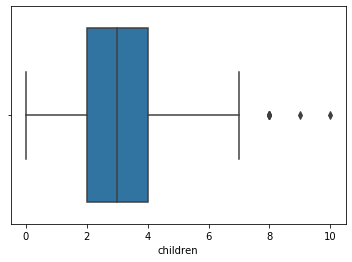

In [784]:
df_columns_z = ['children', 'edu', 'hh_children',
       'hh_totalmembers', 'asset_savings', 'cons_alcohol', 'cons_tobacco',
       'durable_investment', 'nondurable_investment', 'given_mpesa',
       'amount_given_mpesa', 'received_mpesa', 'amount_received_mpesa',
       'net_mpesa', 'saved_mpesa', 'amount_saved_mpesa', 'depressed']

for column in df_columns_z:
    print(column)
    m = np.mean(df[column])
    s = np.std(df[column])
    print('\nm\n', m, '\ns\n', s)


df['Z-score'] = (df[column] - m)/s
df_outlier = df[abs(df['Z-score']) > 2.5]
df_semOutliers = df.drop(df_outlier.index)
    
sns.boxplot(df_semOutliers)


In [776]:
for column in df_columns_z:
    print(column)
    print('2 - \nm\n', m, '\ns\n', s)


children
2 - 
m
 0.1559633027522936 
s
 0.3628205492345928
edu
2 - 
m
 0.1559633027522936 
s
 0.3628205492345928
hh_children
2 - 
m
 0.1559633027522936 
s
 0.3628205492345928
hh_totalmembers
2 - 
m
 0.1559633027522936 
s
 0.3628205492345928
asset_savings
2 - 
m
 0.1559633027522936 
s
 0.3628205492345928
cons_alcohol
2 - 
m
 0.1559633027522936 
s
 0.3628205492345928
cons_tobacco
2 - 
m
 0.1559633027522936 
s
 0.3628205492345928
durable_investment
2 - 
m
 0.1559633027522936 
s
 0.3628205492345928
nondurable_investment
2 - 
m
 0.1559633027522936 
s
 0.3628205492345928
given_mpesa
2 - 
m
 0.1559633027522936 
s
 0.3628205492345928
amount_given_mpesa
2 - 
m
 0.1559633027522936 
s
 0.3628205492345928
received_mpesa
2 - 
m
 0.1559633027522936 
s
 0.3628205492345928
amount_received_mpesa
2 - 
m
 0.1559633027522936 
s
 0.3628205492345928
net_mpesa
2 - 
m
 0.1559633027522936 
s
 0.3628205492345928
saved_mpesa
2 - 
m
 0.1559633027522936 
s
 0.3628205492345928
amount_saved_mpesa
2 - 
m
 0.155963302

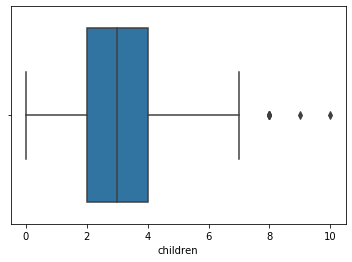

In [781]:
sns.boxplot(df_semOutliers.children)


In [738]:
print('m\n', m, '\ns\n', s)

m
 0.9318479685452162 
s
 0.252006611150123


### Dividindo datasets


O dataset de treino possui:  18.43 % de classes positivas

O dataset de teste possui:  18.63 % de classes positivas


TypeError: bar() missing 1 required positional argument: 'height'

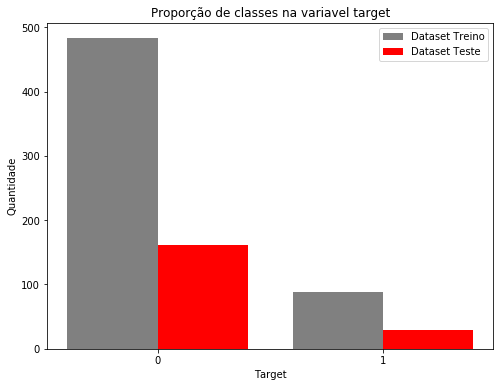

In [743]:
# Separando as variáveis da target
X = df.drop(target_column_name,axis=1).fillna(0)
y = df[target_column_name]

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

# Observando as proporções de classes nas targets do dataset de treino e teste (o objetivo é ter uma proporção semelhante)
fig,ax = plt.subplots(figsize=(8,6))
treino_b = ax.bar(y_train.value_counts().index-0.2,y_train.value_counts().values,0.4, color='gray',label='Dataset Treino')
teste_b  = ax.bar( y_test.value_counts().index+0.2,y_test.value_counts().values ,0.4, color='red' , label='Dataset Teste')

# Percentuais
perc_tr = (y_train.value_counts().values[1]/y_train.value_counts().values[0])*100
print('\nO dataset de treino possui: ',round(perc_tr,2),'% de classes positivas')
perc_ts = (y_test.value_counts().values[1]/y_test.value_counts().values[0])*100
print('\nO dataset de teste possui: ',round(perc_ts,2),'% de classes positivas')

# Recurso visual
ax.set_ylabel('Quantidade')
ax.set_xlabel('Target')
ax.set_title('Proporção de classes na variavel target')
ax.set_xticks([0,1])
ax.legend()
ax.bar_label(treino_b, padding=3)
ax.bar_label(teste_b,  padding=3)
fig.tight_layout()
plt.show()

#### Padronização das features para aplicação do modelo

In [742]:
# Padronização das features para aplicação do modelo
scaler = StandardScaler()

# Transformação
X_train_ = X_train.copy()
X_test_ = X_train.copy()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Variancia total do dataframe após a padronização
std_apos = X_train.std()
print('Desvio padrão após a padronização: ', round(std_apos,2))

# Transformando os datasets em pandas dataframes para maior facilidade de manipulação
X_train = pd.DataFrame(X_train, columns=scaler._get_param_names())
X_test  = pd.DataFrame(X_test , columns=scaler._get_param_names())

Desvio padrão após a padronização:  1.0


ValueError: Shape of passed values is (572, 20), indices imply (572, 3)

## iii) treinamento e validação dos modelos,
utilizando as melhores práticas em relação a estratégias de divisão de dados para otimização de hiperparâmetros e
seleção de modelos

 - Acurácia
 - Precision
 - Recall
 - F1 Score
 - ROC AUC score

## iv) interpretação do modelo treinado, 
buscando obter insights sobre o impacto dos atributos na tomada de decisão